In [1]:
import numpy as np
import pandas as pd

from estimagic.visualization.univariate_effects import plot_univariate_effects

# Visualizing an Optimization Problem

In order to choose the right optimization algorithm, it is important to know as much as possible about the problem one wants to solve. If the criterion function has only one or two parameters, plotting it over the sample space can be helpful. However, such low dimensional problems are rare. 

In this notebook we show how higher dimensional functions can be visualized using estimagic and which properties of the criterion function can be learned from them. 

We start with the sphere function and then progress to more interesting examples. 

## The simple sphere function

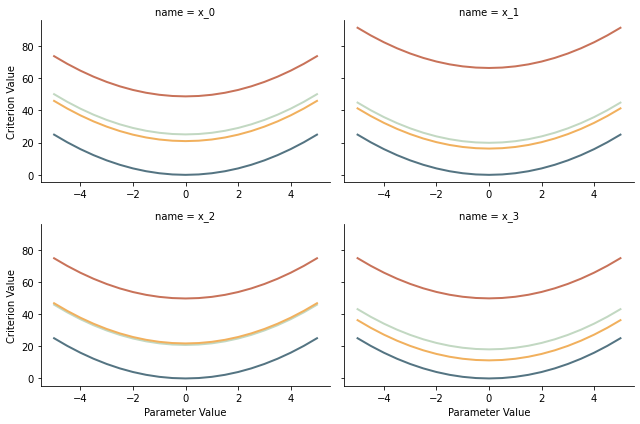

In [15]:
def sphere(params):
    return (params["value"] ** 2).sum()


params = pd.DataFrame(
    data=np.zeros(4),
    columns=["value"],
    index=[f"x_{i}" for i in range(4)],
)

params["lower_bound"] = -5
params["upper_bound"] = 5


plot_univariate_effects(
    criterion=sphere,
    params=params,
    n_random_values=3,
)

The plot gives us the following insights:

- No matter at which value the other parameters are, there seems to be a minimum at 0 for each parameter. Thus, coordinate descent is probably a good strategy. 
- There is no sign of local optima. 
- There is no sign of noise or non-differentiablities (careful, grid might not be fine enough).
- The problem seems to be convex.

-> We would expect almost any derivative based optimizer to work well here (which we know to be correct in that case)

## The alpine function

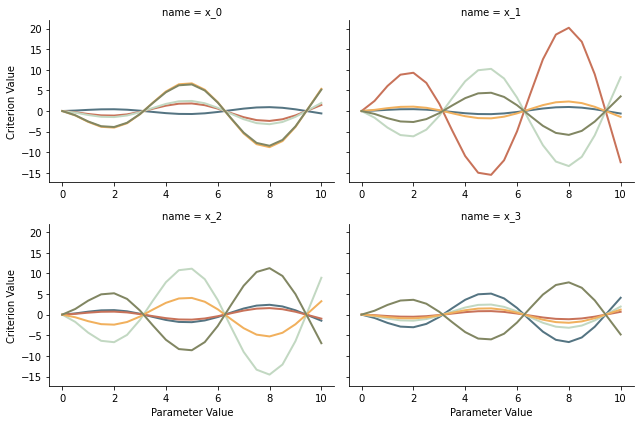

In [16]:
def alpine(params):
    x = params["value"].to_numpy()
    res = -np.prod(np.sqrt(x) * np.sin(x))
    return res


params = pd.DataFrame(
    np.random.uniform(low=0, high=10, size=4),
    columns=["value"],
    index=[f"x_{i}" for i in range(4)],
)
params["lower_bound"] = 0
params["upper_bound"] = 10


plot_univariate_effects(
    criterion=alpine,
    params=params,
    n_random_values=4,
    seed=1234,
)

Here the picture looks very differently:

- The minimum along each coordinate seems to strongly depend on the value of all other parameters. This means that fixing some parameters initially and only optimizing the rest would not work well. 
- There is no sign of noise or non-differentiablities.
- There are several local optima.

-> We would expect that a gradient based optimizer is efficient at finding local optima. Thus, a good strategy would be to run gradient based optimizers from many starting values.